In [2]:
import tensorflow as tf
import tensorflow_probability as tfp #had to pip install

# Weather Model
From tensor flow documentation
we will model a imple weather system that tries to predict the temperature on each day given the info:
1. Cold days are encoded by 0 and hodt days by 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day
4. A hot day has a 20% chance of being followed by a cold day. 
5. On each day, the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day

if still unfamiliar with std dev, it is simply the range of expected values. in the above example for instance, the avg temp on a hot day is 15 and it ranges from 5 to 25.

### Now we model with tensorflow

In [4]:
tfdist = tfp.distributions #supposedly a shortcut
initialdist = tfdist.Categorical(probs=[0.8, 0.2]) #in ref to point 2
transitiondist = tfdist.Categorical(probs = [[0.7, 0.3], [0.2, 0.8]]) #in ref to points 3 and 4 --mindful; probs = [[a,b], [c,d]]
observationdist = tfdist.Normal(loc=[0., 15.], scale = [5., 10. ]) #in ref to point 5

#the loc argumetn reps the mean and scale is to std dev

In [5]:
ourmodel = tfdist.HiddenMarkovModel(
    initial_distribution = initialdist,
    transition_distribution = transitiondist, 
    observation_distribution = observationdist,
    num_steps = 7 #this arg refers to the num of das we want the model to reiterate in making predictions ....
)

In [6]:
#to get the expected temps on each day we can--this is that part

varmean = ourmodel.mean()
#due to the way Tensorflow works on a lower level, we need to eval part of teh graph from within a session to see the val of the tensor

with tf.compat.v1.Session() as anynameofurchoice:
    print(varmean, '\n',varmean.numpy())

tf.Tensor([3.        5.9999995 7.4999995 8.25      8.625     8.812501  8.90625  ], shape=(7,), dtype=float32) 
 [3.        5.9999995 7.4999995 8.25      8.625     8.812501  8.90625  ]


## ourmodel.mean() is a partially defined tensor with partially defined computations dt can only be displayed with the help of a session.. 
NB: based on the temp(values) we should be able to tell if it is a cold or hot day
now check out dudes vals
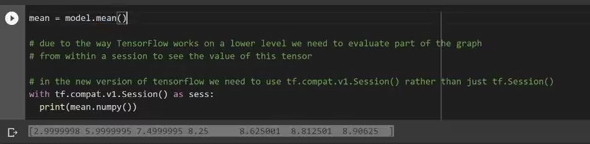

In [8]:
anodadist = tfp.distributions #supposedly a shortcut
initialdist = anodadist.Categorical(probs=[0.8, 0.2]) #in ref to point 2
# transitiondist = tfdist.Categorical(probs =[[0.7, 0.3], [0.2, 0.8]] ) #in ref to points 3 and 4 --mindful; probs = [[a,b], [c,d]]
transitiondist = anodadist.Categorical(probs = [[0.5, 0.5], [0.2, 0.8]]) #in ref to points 3 and 4 --mindful; probs = [[a,b], [c,d]]
observationdist = anodadist.Normal(loc=[0., 15.], scale = [5., 10. ]) #in ref to point 5


anodamodel = anodadist.HiddenMarkovModel(
    initial_distribution = initialdist,
    transition_distribution = transitiondist, 
    observation_distribution = observationdist,
    num_steps = 7 #this arg refers to the num of das we want the model to reiterate in making predictions ....
)

anodamean = anodamodel.mean()
#due to the way Tensorflow works on a lower level, we need to eval part of teh graph from within a session to see the val of the tensor

with tf.compat.v1.Session() as anynameofurchoice:
    print(anodamean, '\n',anodamean.numpy())

tf.Tensor([ 3.        8.4      10.02     10.506    10.651799 10.69554  10.708661], shape=(7,), dtype=float32) 
 [ 3.        8.4      10.02     10.506    10.651799 10.69554  10.708661]


In [9]:
anodadist = tfp.distributions #supposedly a shortcut
initialdist = anodadist.Categorical(probs=[0.4, 0.6]) #in ref to point 2
# transitiondist = tfdist.Categorical(probs =[[0.7, 0.3], [0.2, 0.8]] ) #in ref to points 3 and 4 --mindful; probs = [[a,b], [c,d]]
transitiondist = anodadist.Categorical(probs = [[0.5, 0.5], [0.2, 0.8]]) #in ref to points 3 and 4 --mindful; probs = [[a,b], [c,d]]
observationdist = anodadist.Normal(loc=[0., 15.], scale = [5., 10. ]) #in ref to point 5


anodamodel = anodadist.HiddenMarkovModel(
    initial_distribution = initialdist,
    transition_distribution = transitiondist, 
    observation_distribution = observationdist,
    num_steps = 7 #this arg refers to the num of das we want the model to reiterate in making predictions ....
)

anodamean = anodamodel.mean()
#due to the way Tensorflow works on a lower level, we need to eval part of teh graph from within a session to see the val of the tensor

with tf.compat.v1.Session() as anynameofurchoice:
    print(anodamean, '\n',anodamean.numpy())

tf.Tensor([ 9.       10.2      10.559999 10.668002 10.7004   10.71012  10.713037], shape=(7,), dtype=float32) 
 [ 9.       10.2      10.559999 10.668002 10.7004   10.71012  10.713037]


## It is now quite clear that markov model has its values only changing as and when probabilities and mean/std devs change